In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\jnoot\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jnoot\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\jnoot\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
x=df.drop(columns=['CustomerID','Age','Gender'],axis=1)

In [9]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [12]:
from sklearn.cluster import KMeans

In [13]:
ss=[]

for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=7)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

In [14]:
ss

[183069.17582751293,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37271.8862365895,
 30273.39431207004,
 25050.832307547524,
 21806.812998695455,
 19634.55462934998]

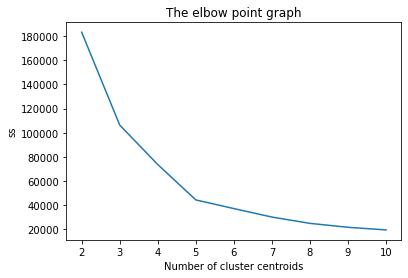

In [15]:
plt.plot(range(2,11),ss)
plt.xlabel('Number of cluster centroids')
plt.ylabel('ss')
plt.title('The elbow point graph')
plt.show()

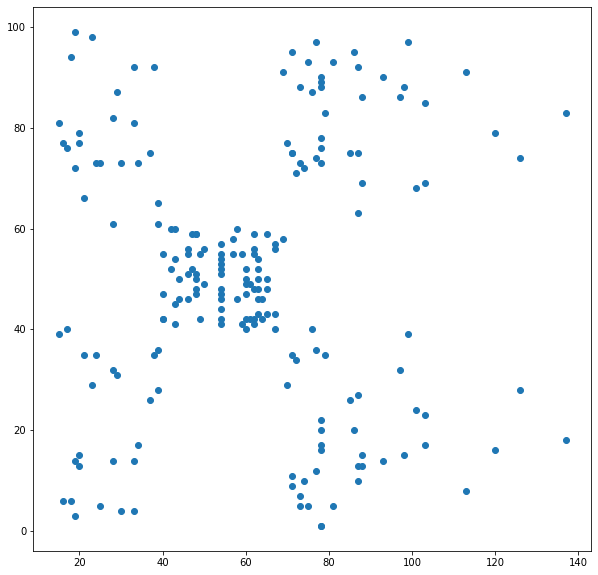

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [17]:
kmeans=KMeans(n_clusters=5,random_state=12)

y=kmeans.fit_predict(x)

In [18]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [19]:
x[y==3]

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [20]:
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]

(array([55.2962963 , 86.53846154, 88.2       , 25.72727273, 26.30434783]),
 array([49.51851852, 82.12820513, 17.11428571, 79.36363636, 20.91304348]))

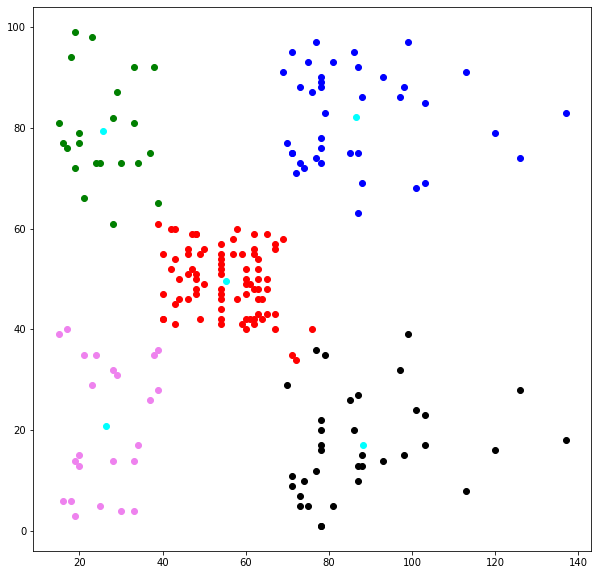

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(x[y==0]['Annual Income (k$)'],x[y==0]['Spending Score (1-100)'],c='red',label='Cluster-1')
plt.scatter(x[y==1]['Annual Income (k$)'],x[y==1]['Spending Score (1-100)'],c='blue',label='Cluster-2')
plt.scatter(x[y==2]['Annual Income (k$)'],x[y==2]['Spending Score (1-100)'],c='black',label='Cluster-3')
plt.scatter(x[y==3]['Annual Income (k$)'],x[y==3]['Spending Score (1-100)'],c='green',label='Cluster-4')
plt.scatter(x[y==4]['Annual Income (k$)'],x[y==4]['Spending Score (1-100)'],c='violet',label='Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='cyan',label='Centroids')
plt.show()

In [22]:
x1=x[y==0]
x1['classification']=1
x1

C:\Users\jnoot\AppData\Local\Temp\ipykernel_14728\2092900207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['classification']=1


,Annual Income (k$),Spending Score (1-100),classification
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [23]:
x2=x[y==1]
x2['classification']=2
x2

C:\Users\jnoot\AppData\Local\Temp\ipykernel_14728\2891697922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['classification']=2


,Annual Income (k$),Spending Score (1-100),classification
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [24]:
x3=x[y==2]
x3['classification']=3
x3

C:\Users\jnoot\AppData\Local\Temp\ipykernel_14728\2993764163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x3['classification']=3


,Annual Income (k$),Spending Score (1-100),classification
124,70,29,3
128,71,11,3
130,71,9,3
134,73,5,3
136,73,7,3
138,74,10,3
140,75,5,3
144,77,12,3
146,77,36,3
148,78,22,3


In [25]:
x4=x[y==3]
x4['classification']=4
x4

C:\Users\jnoot\AppData\Local\Temp\ipykernel_14728\1148565207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x4['classification']=4


,Annual Income (k$),Spending Score (1-100),classification
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4
11,19,99,4
13,20,77,4
15,20,79,4
17,21,66,4
19,23,98,4


In [26]:
x5=x[y==4]
x5['classification']=5
x5

C:\Users\jnoot\AppData\Local\Temp\ipykernel_14728\2190463775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x5['classification']=5


,Annual Income (k$),Spending Score (1-100),classification
0,15,39,5
2,16,6,5
4,17,40,5
6,18,6,5
8,19,3,5
10,19,14,5
12,20,15,5
14,20,13,5
16,21,35,5
18,23,29,5


In [27]:
classdf=pd.concat([x1,x2,x3,x4,x5])
classdf

,Annual Income (k$),Spending Score (1-100),classification
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
36,34,17,5
38,37,26,5
40,38,35,5
42,39,36,5


In [28]:
classdf.to_csv('Mall_customer.csv')

In [29]:
classdf.describe()

,Annual Income (k$),Spending Score (1-100),classification
count,200.000000,200.000000,200.000000
mean,60.560000,50.200000,2.335000
std,26.264721,25.823522,1.397332
min,15.000000,1.000000,1.000000
25%,41.500000,34.750000,1.000000
50%,61.500000,50.000000,2.000000
75%,78.000000,73.000000,3.000000
max,137.000000,99.000000,5.000000


In [30]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [31]:
df['classification']=classdf['classification']
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),classification
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [32]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

df['Gender']=label.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),classification
0,1,1,19,15,39,5
1,2,1,21,15,81,4
2,3,0,20,16,6,5
3,4,0,23,16,77,4
4,5,0,31,17,40,5
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,3


In [33]:
df=df.drop(columns='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),classification
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,3
197,1,32,126,74,2
198,1,32,137,18,3


In [34]:
x=df.drop(columns='classification',axis=1)
y=df.classification

In [35]:
y

0      5
1      4
2      5
3      4
4      5
      ..
195    2
196    3
197    2
198    3
199    2
Name: classification, Length: 200, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train,y_train)

C:\Users\jnoot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
model.score(x_test,y_test)

0.9

In [40]:
model.predict([[0,40,80,80]])

C:\Users\jnoot\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)